# 最小化函数

<h1>Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#minimize-函数" data-toc-modified-id="minimize-函数-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>minimize 函数</a></span></li><li><span><a href="#Rosenbrock-函数" data-toc-modified-id="Rosenbrock-函数-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Rosenbrock 函数</a></span></li><li><span><a href="#优化方法" data-toc-modified-id="优化方法-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>优化方法</a></span><ul class="toc-item"><li><span><a href="#BFGS-算法" data-toc-modified-id="BFGS-算法-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>BFGS 算法</a></span></li><li><span><a href="#Nelder-Mead-Simplex-算法" data-toc-modified-id="Nelder-Mead-Simplex-算法-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Nelder-Mead Simplex 算法</a></span></li><li><span><a href="#Powell-算法" data-toc-modified-id="Powell-算法-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Powell 算法</a></span></li></ul></li></ul></div>

## minimize 函数

In [1]:
%pylab inline
set_printoptions(precision=3, suppress=True)#precision精度 suppress零点限

Populating the interactive namespace from numpy and matplotlib


已知斜抛运动的水平飞行距离公式：

* $d = 2 \frac{v_0^2}{g} \sin(\theta) \cos (\theta)$
* d 水平飞行距离
* v0 初速度大小
* g 重力加速度
* θ 抛出角度

希望找到使 d 最大的角度 θ。

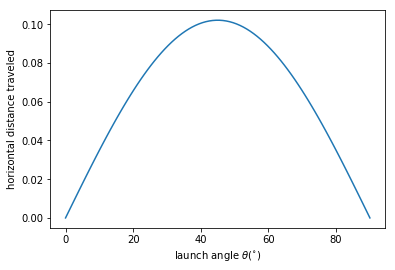

In [2]:
# 定义距离函数：
def dist(theta, v0):
    """calculate the distance travelled by a projectile launched
    at theta degrees with v0 (m/s) initial velocity.
    """
    g = 9.8
    theta_rad = pi * theta / 180
    return 2 * v0 ** 2 / g * sin(theta_rad) * cos(theta_rad)
theta = linspace(0,90,90)
p = plot(theta, dist(theta, 1.))
# 横纵坐标轴
xl = xlabel(r'launch angle $\theta (^{\circ})$')
yl = ylabel('horizontal distance traveled')

In [3]:
# 最大化距离就相当于最小化距离的负数
def neg_dist(theta, v0):
    return -1 * dist(theta, v0)

In [4]:
# 导入 scipy.optimize.minimize：
from scipy.optimize import minimize
result = minimize(neg_dist, 40, args=(1,))
print "optimal angle = {:.1f} degrees".format(result.x[0])

optimal angle = 45.0 degrees


minimize 接受三个参数：
* 第一个是要优化的函数
* 第二个是初始猜测值,只影响函数执行时间
* 第三个则是优化函数的附加参数，默认 minimize 将优化函数的第一个参数作为优化变量，所以第三个参数输入的附加参数从优化函数的第二个参数开始。

In [5]:
# 查看返回结果：
print result

      fun: -0.10204080673028025
 hess_inv: array([[8095.278]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 27
      nit: 3
     njev: 9
   status: 0
  success: True
        x: array([45.012])


## Rosenbrock 函数

Rosenbrock 函数是一个用来测试优化函数效果的一个非凸函数：

$f(x)=\sum\limits_{i=1}^{N-1}{100\left(x_{i+1}^2 - x_i\right) ^2 + \left(1-x_{i}\right)^2 }$

In [6]:
# 导入该函数
from scipy.optimize import rosen
from mpl_toolkits.mplot3d import Axes3D

In [7]:
# 使用 N = 2 的 Rosenbrock 函数
x, y = meshgrid(np.linspace(-2,2,25), np.linspace(-0.5,3.5,25))
z = rosen([x,y])

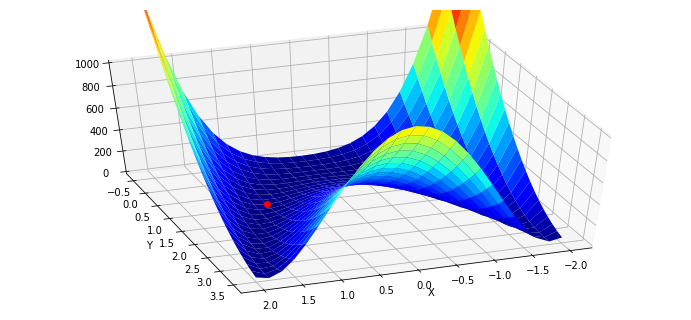

In [8]:
# 图像和最低点 (1,1)：
# 设置图像大小
fig = figure(figsize=(12,5.5))
ax = fig.gca(projection="3d")
ax.azim = 70; ax.elev = 48
ax.set_xlabel("X"); ax.set_ylabel("Y")
ax.set_zlim((0,1000))
p = ax.plot_surface(x,y,z,rstride=1, cstride=1, cmap=cm.jet)
rosen_min = ax.plot([1],[1],[0],"ro")

In [9]:
# 传入初始值：
x0 = [1.3, 1.6, -0.5, -1.8, 0.8]
result = minimize(rosen, x0)
print result.x

[-0.962  0.936  0.881  0.778  0.605]


In [14]:
# 随机给定初始值：
x0 = np.random.randn(10)
result = minimize(rosen, x0)
precision=3
print x0
print result.x

[-1.848  1.229 -0.332 -0.575  0.403  1.349 -0.991 -0.166 -0.29  -0.804]
[-0.993  0.997  0.998  0.999  0.999  0.999  0.998  0.997  0.994  0.988]


对于 `N > 3`，函数的最小值为 $(x_1,x_2,...,x_N)=(1,1,...,1)$，不过有一个局部极小值点 $(x_1,x_2,...,x_N)=(−1,1,...,1)$，所以随机初始值如果选的不好的话，有可能返回的结果是局部极小值点：

## 优化方法

### BFGS 算法

`minimize` 函数默认根据问题是否有界或者有约束，使用 `'BFGS', 'L-BFGS-B', 'SLSQP'` 中的一种。

In [16]:
## minimize?? 或者 info(minimize)查看信息

默认没有约束时，使用的是[BFGS方法](https://en.wikipedia.org/wiki/Broyden%E2%80%93Fletcher%E2%80%93Goldfarb%E2%80%93Shanno_algorithm)。

In [22]:
# 利用callback参数查看迭代的历史：
x0 = [-1.5, 4.5]
xi = [x0]
result = minimize(rosen, x0, callback=xi.append)
# 将输入的列表转换为numpy数组
xi = np.asarray(xi)
precision=3
print xi.shape
print result.x
# 252次迭代
print "in {} function evaluations.".format(result.nfev)

(48, 2)
[1. 1.]
in 252 function evaluations.


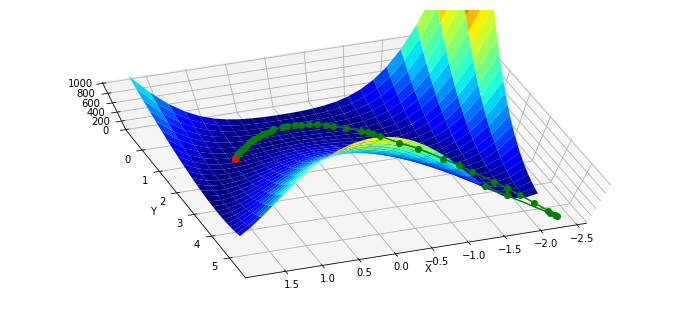

In [23]:
# 绘图显示轨迹：
x, y = meshgrid(np.linspace(-2.3,1.75,25), np.linspace(-0.5,4.5,25))
z = rosen([x,y])
fig = figure(figsize=(12,5.5))
ax = fig.gca(projection="3d"); ax.azim = 70; ax.elev = 75
ax.set_xlabel("X"); ax.set_ylabel("Y"); ax.set_zlim((0,1000))

# 图像
p = ax.plot_surface(x,y,z,rstride=1, cstride=1, cmap=cm.jet)
# 显示路径
intermed = ax.plot(xi[:,0], xi[:,1], rosen(xi.T), "g-o")
# 最低点 (1,1)：
rosen_min = ax.plot([1],[1],[0],"ro")

BFGS 需要计算函数的 Jacobian 矩阵：

给定$\left[y_1,y_2,y_3\right] = f(x_0, x_1, x_2)$
$$J=\left[ \begin{matrix} \frac{\partial y_1}{\partial x_0} & \frac{\partial y_1}{\partial x_1} & \frac{\partial y_1}{\partial x_2} \\\ \frac{\partial y_2}{\partial x_0} & \frac{\partial y_2}{\partial x_1} & \frac{\partial y_2}{\partial x_2} \\\ \frac{\partial y_3}{\partial x_0} & \frac{\partial y_3}{\partial x_1} & \frac{\partial y_3}{\partial x_2} \end{matrix} \right]$$
在我们的例子中:
$$J= \left[ \begin{matrix}\frac{\partial rosen}{\partial x_0} & \frac{\partial rosen}{\partial x_1} \end{matrix} \right]$$

In [24]:
# 导入 rosen 函数的 Jacobian 函数 rosen_der
from scipy.optimize import rosen_der

In [26]:
# 此时，我们将 Jacobian 矩阵作为参数传入：
xi = [x0]
result = minimize(rosen, x0, jac=rosen_der, callback=xi.append)
xi = np.asarray(xi)
print xi.shape
print "in {} function evaluations and {} jacobian evaluations.".format(result.nfev, result.njev)

(48, 2)
in 62 function evaluations and 62 jacobian evaluations.


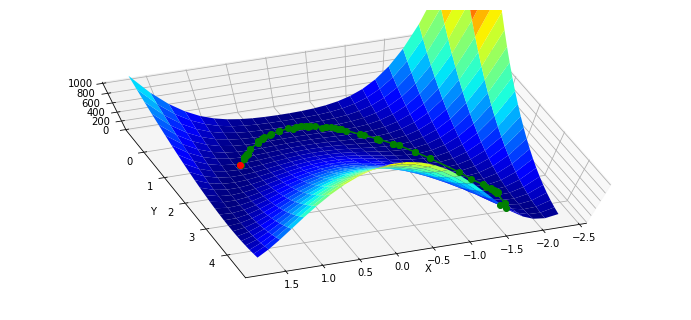

In [29]:
# 函数计算的开销大约减少了一半，迭代路径与上面的基本吻合：
x, y = meshgrid(np.linspace(-2.3,1.75,25), np.linspace(-0.5,4.5,25))
z = rosen([x,y])
fig = figure(figsize=(12,5.5))
ax = fig.gca(projection="3d"); ax.azim = 70; ax.elev = 75
ax.set_xlabel("X"); ax.set_ylabel("Y"); ax.set_zlim((0,1000))
p = ax.plot_surface(x,y,z,rstride=1, cstride=1, cmap=cm.jet)
intermed = ax.plot(xi[:,0], xi[:,1], rosen(xi.T), "g-o")
rosen_min = ax.plot([1],[1],[0],"ro")

### Nelder-Mead Simplex 算法

In [30]:
# 改变 minimize 使用的算法，使用 Nelder–Mead 单纯形算法：
xi = [x0]
result = minimize(rosen, x0, method="nelder-mead", callback = xi.append)
xi = np.asarray(xi)
print xi.shape
print "Solved the Nelder-Mead Simplex method with {} function evaluations.".format(result.nfev)

(120, 2)
Solved the Nelder-Mead Simplex method with 226 function evaluations.


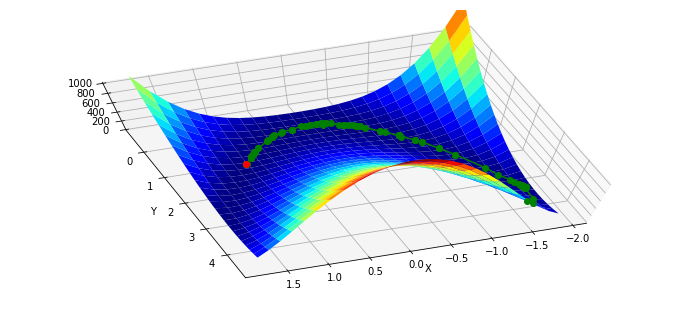

In [31]:
x, y = meshgrid(np.linspace(-1.9,1.75,25), np.linspace(-0.5,4.5,25))
z = rosen([x,y])
fig = figure(figsize=(12,5.5))
ax = fig.gca(projection="3d"); ax.azim = 70; ax.elev = 75
ax.set_xlabel("X"); ax.set_ylabel("Y"); ax.set_zlim((0,1000))
p = ax.plot_surface(x,y,z,rstride=1, cstride=1, cmap=cm.jet)
intermed = ax.plot(xi[:,0], xi[:,1], rosen(xi.T), "g-o")
rosen_min = ax.plot([1],[1],[0],"ro")

### Powell 算法

In [32]:
xi = [x0]
result = minimize(rosen, x0, method="powell", callback=xi.append)
xi = np.asarray(xi)
print xi.shape
print "Solved Powell's method with {} function evaluations.".format(result.nfev)

(31, 2)
Solved Powell's method with 855 function evaluations.


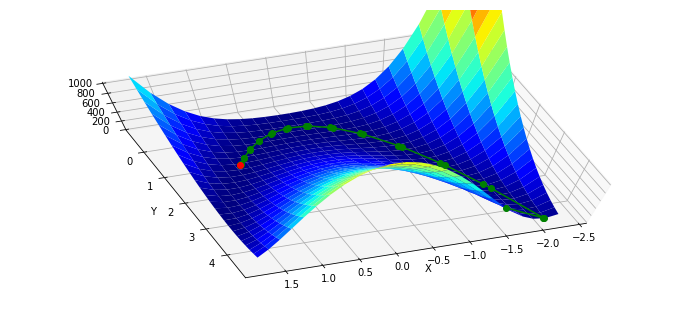

In [33]:
x, y = meshgrid(np.linspace(-2.3,1.75,25), np.linspace(-0.5,4.5,25))
z = rosen([x,y])
fig = figure(figsize=(12,5.5))
ax = fig.gca(projection="3d"); ax.azim = 70; ax.elev = 75
ax.set_xlabel("X"); ax.set_ylabel("Y"); ax.set_zlim((0,1000))
p = ax.plot_surface(x,y,z,rstride=1, cstride=1, cmap=cm.jet)
intermed = ax.plot(xi[:,0], xi[:,1], rosen(xi.T), "g-o")
rosen_min = ax.plot([1],[1],[0],"ro")